# **EXPLORATORY DATA ANALYSIS OF CENSUS ADULT INCOME DATA**

In this notebook, we'll explore the `census_adult_income` dataset from BigQuery. This dataset provides demographic, work, and income details for a sample of adults. Our goal is to understand the structure of the data, identify any patterns or anomalies, and derive preliminary insights.

# **Initial Setup and Data Loading**
Before diving into the analysis, we need to set up our environment and load the data.

In [24]:
# Importing necessary libraries and modules
import os                   
import pandas as pd                 
import numpy as np            
import matplotlib.pyplot as plt     
import seaborn as sns          
from google.cloud import bigquery

In [25]:
# Set display options for better readability in the notebook
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.0f}'.format

# Setting global plotting settings using Matplotlib
plt.style.use('ggplot')

In [26]:
# Set GOOGLE CLOUD CREDENTIALS path
credentials = os.environ['CREDENTIALS'] = r'\\Farid-laptop\D\My Personal Files\MPF Online\04 - CAREERS\My Portfolio\Data Science\BigQuery API\CREDENTIALS.json'

# Use the JSON key file for authentication
client = bigquery.Client.from_service_account_json(credentials)

---
### Fetching Data from BigQuery
We'll now fetch our data from the BigQuery table `census_adult_income`.

In [27]:
# Specify the dataset and table you want to access
project = 'bigquery-public-data'
dataset = 'ml_datasets'
table = 'census_adult_income'

# Build the query
table_id = project + '.' + dataset + '.' + table

query = f'''
SELECT
  *
FROM
  `{table_id}`
'''

# Execute the query and load the data into a dataframe
query_output = client.query(query)
df = query_output.to_dataframe()

---
# **Preliminary Data Examination**
Let's start by taking a peek at our data and understanding its structure.

In [28]:
# Display the first few rows of the dataframe to get an overview
df.head(5)

,age,workclass,functional_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,297847,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,344425,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,131461,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,190350,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,171090,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K


---
### Data Types and Missing Values
Understanding the data types of each column and checking for missing values is crucial as it can impact further analysis and modeling.

In [29]:
# Check the data types, non-null counts for each column, and get the total number of records and columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  Int64 
 1   workclass          32561 non-null  object
 2   functional_weight  32561 non-null  Int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  Int64 
 5   marital_status     32561 non-null  object
 6   occupation         32561 non-null  object
 7   relationship       32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  capital_gain       32561 non-null  Int64 
 11  capital_loss       32561 non-null  Int64 
 12  hours_per_week     32561 non-null  Int64 
 13  native_country     32561 non-null  object
 14  income_bracket     32561 non-null  object
dtypes: Int64(6), object(9)
memory usage: 3.9+ MB


---
### Statistical Summary
For our numerical columns, a statistical summary can provide insights into distributions, potential outliers, and more.

In [30]:
# Get a statistical summary for numerical columns
df.describe()

,age,functional_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561,32561,32561,32561,32561,32561
mean,39,189778,10,1078,87,40
std,14,105550,3,7385,403,12
min,17,12285,1,0,0,1
25%,28,117827,9,0,0,40
50%,37,178356,10,0,0,40
75%,48,237051,12,0,0,45
max,90,1484705,16,99999,4356,99


---
### Checking for Missing Values
Handling missing values is crucial. Let's identify if any columns have missing values.

In [31]:
# Check for missing values in each column
df.isnull().sum()

age                  0
workclass            0
functional_weight    0
education            0
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income_bracket       0
dtype: int64

---
### Unique Values

Identifying the number of unique values in each column can help us understand the diversity and granularity of our data.

In [32]:
# Check the number of unique values in each column
df.nunique()

age                     73
workclass                9
functional_weight    21648
education               16
education_num           16
marital_status           7
occupation              15
relationship             6
race                     5
sex                      2
capital_gain           119
capital_loss            92
hours_per_week          94
native_country          42
income_bracket           2
dtype: int64

---
### **Key Takeaways**
- The dataset contains 32,561 records and 15 columns.
- There don't appear to be any missing values, making our dataset relatively clean.
- Columns like `age`, `functional_weight`, and `hours_per_week` have wide ranges, indicating varied demographic and working patterns.
- `education_num` offers a numeric representation of education levels, ranging from 1 to 16.
- Some categorical columns, such as `workclass`, `education`, and `occupation`, have multiple unique values. These will be interesting to explore further.

In the subsequent sections, we will delve deeper into individual columns, perform visual analyses, and aim to derive more detailed insights.
</div>

---
# **Categorical Variable Analysis**
In this section, we'll focus on the categorical variables. We'll dive deeper into their individual distributions and see how varied the data is for each of these columns.

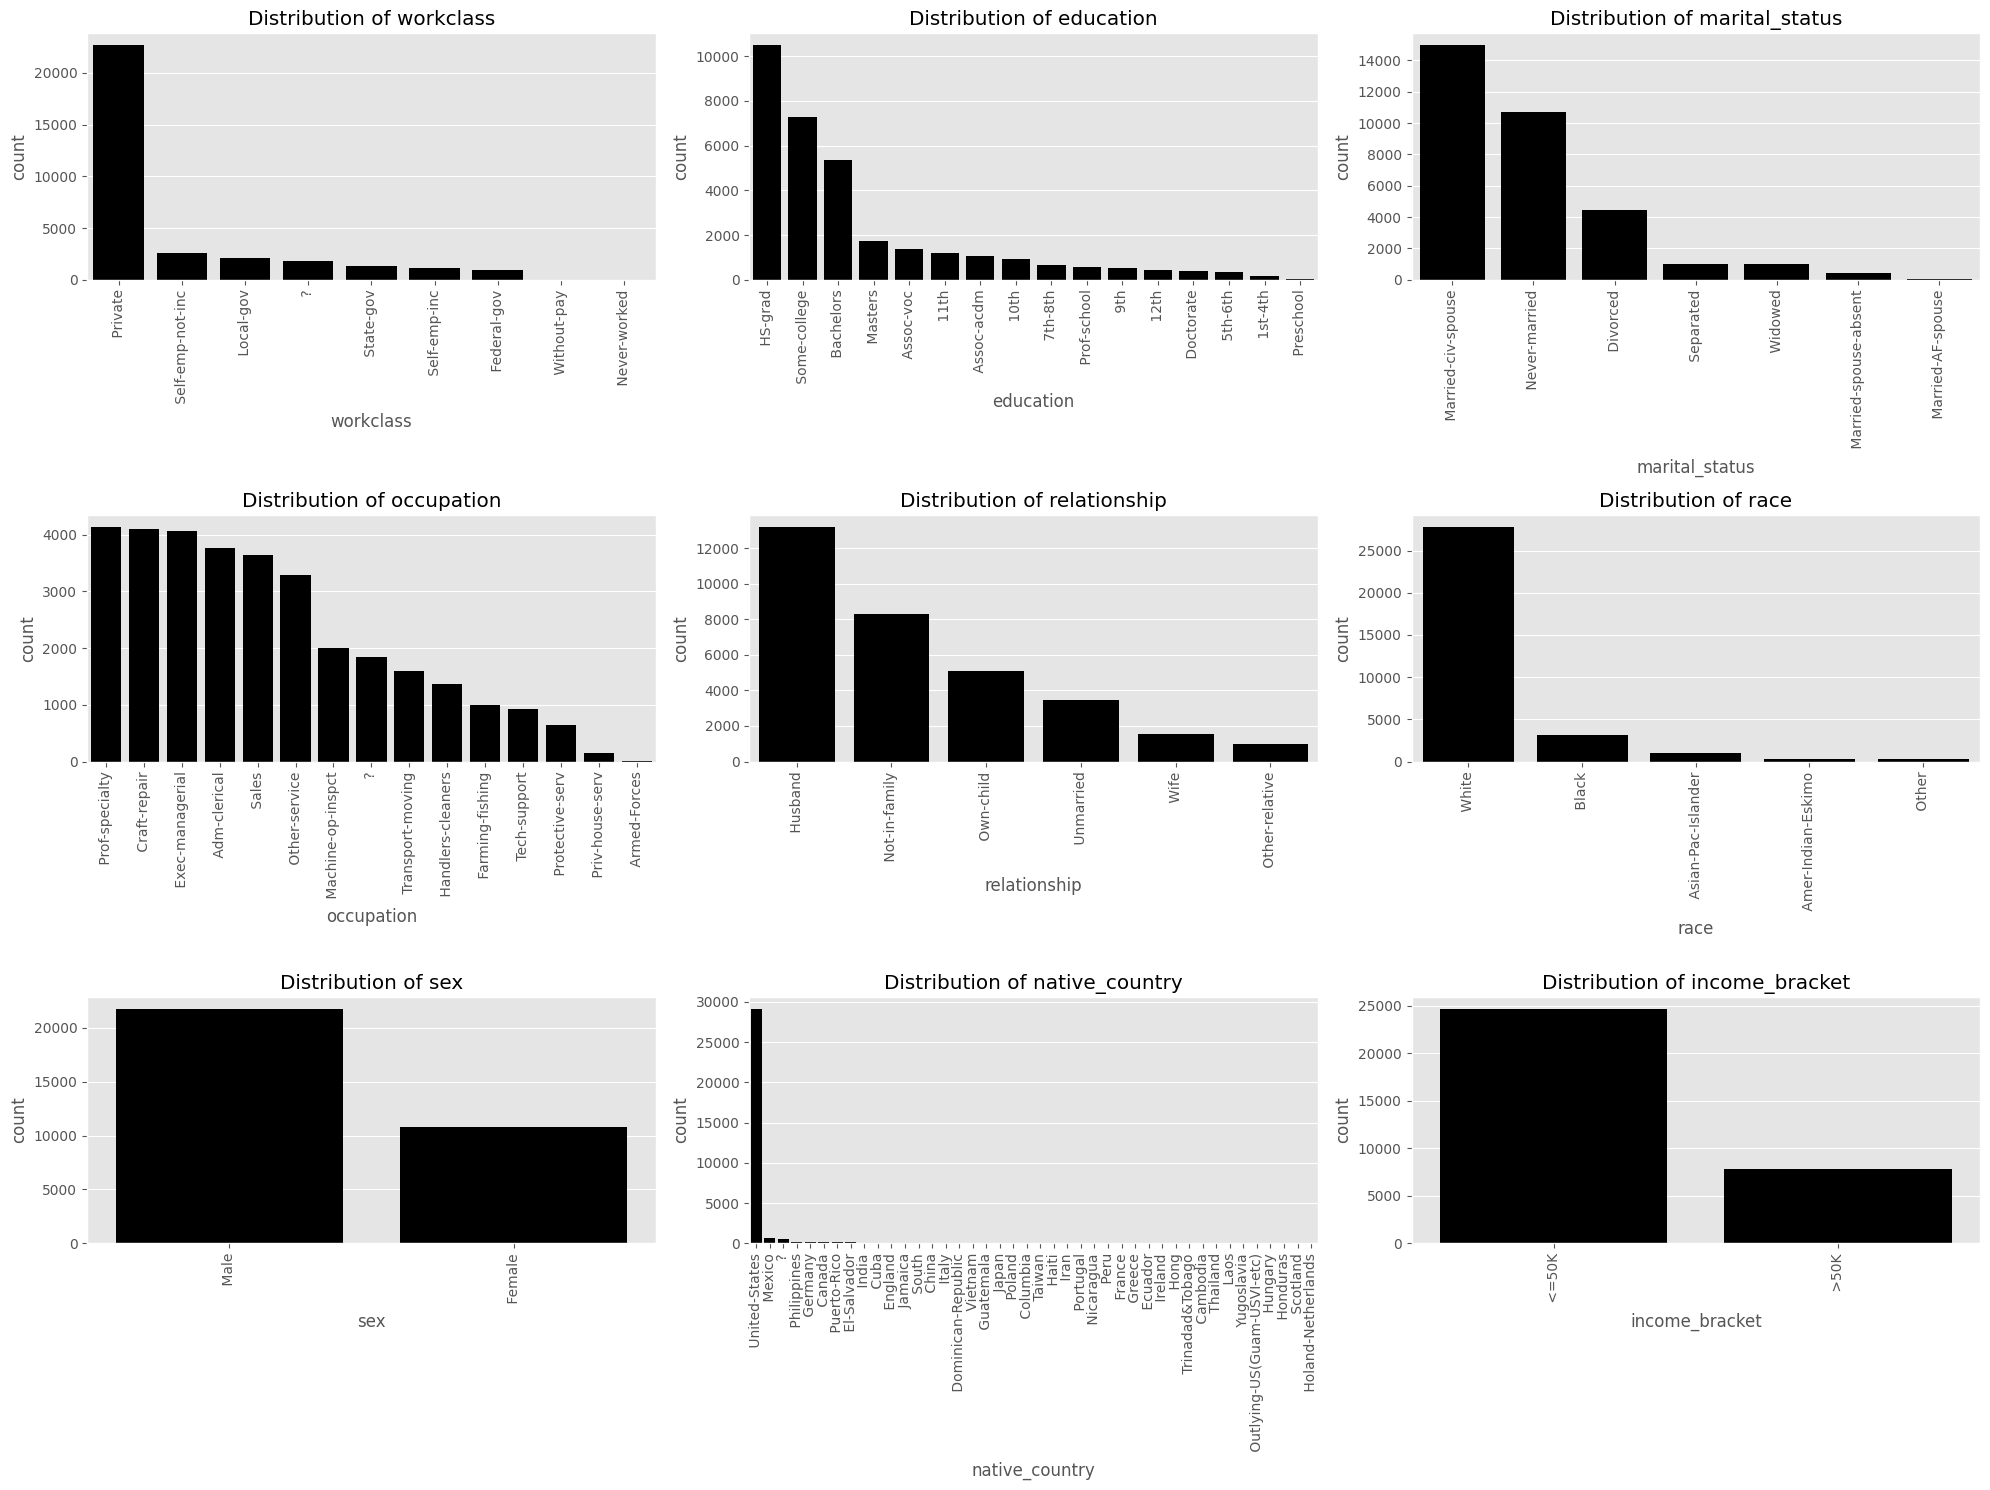

In [46]:
# Identify the categorical columns from the dataset
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income_bracket']

# Initialize a 3x3 grid of subplots and set the total figure size
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the 3x3 grid to a 1D array for easy indexing
axs = axs.flatten()

# Loop through the list of categorical columns
for idx, col in enumerate(categorical_columns):
    
    # Use Seaborn's countplot function to plot countplots.
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axs[idx], color='black')
    
    # Rotate x-axis labels for better visibility
    axs[idx].tick_params(axis='x', rotation=90)
    
    # Set the title for each subplot
    axs[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

---
### **Key Takeaways**
1. **Work & Education:**
   - Most people are employed in the 'Private' sector. This is followed by those who are self-employed but not incorporated.
   - The dominant education levels are 'HS-grad', 'Some-college', and 'Bachelors', suggesting a good mix of both high school and college-educated individuals.  
2. **Family & Relationships:**
   - Many individuals are married to civilian spouses, but there's also a large group that's never been married. Divorced individuals make up the third-largest group.
   - There's a significant gender skew, with twice as many males as females in the dataset.
   - Interestingly, the dataset has many more 'Husbands' than 'Wives'. This might reflect the male dominance or perhaps the way roles are labeled in households.  
3. **Profession & Earnings:**
   - 'Prof-specialty', 'Craft-repair', and 'Exec-managerial' are top occupations, suggesting a mix of specialized professionals, craftsmen, and managerial roles.
   - The majority earns <=50K, indicating a leaning towards the lower to middle-income range.  
4. **Demographics:**
   - The dataset is overwhelmingly White, with a stark drop when it comes to other racial categories. This racial distribution should be considered if drawing broader conclusions.
   - A massive portion of the dataset is from the U.S., with other countries being marginally represented. This indicates potential bias towards U.S. demographics.  
5. **Missing Values**
   - Both the Workclass and Occupations columns in the dataset contain entries labeled as '?', indicating missing or unclassified data. Specifically, the Workclass column has 1,836 entries with '?' values, while the Occupations column has 1,843 entries with '?'. It's essential to acknowledge these missing values when conducting data analysis and modeling.
### **Overall:**
The dataset appears to majorly represent middle-income, U.S.-based White males with a mix of high school and college education working in the private sector. While there's good diversity in education and marital status, there's clear underrepresentation in gender, race, and non-U.S. origins.

---
# **Continuous Variable Analysis**
Following our deep dive into the categorical variables, we'll now shift our focus to the continuous, or numerical, variables in our dataset. This section will explore their distributions, relationships, and other insightful patterns.

### Distribution of Continuous Variables
Below are the distributions of each continuous variable in our dataset. This helps us understand the shape, centrality,

In [34]:
# Identifying the continuous/numerical columns from the dataset
continuous_columns = ['age', 'functional_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

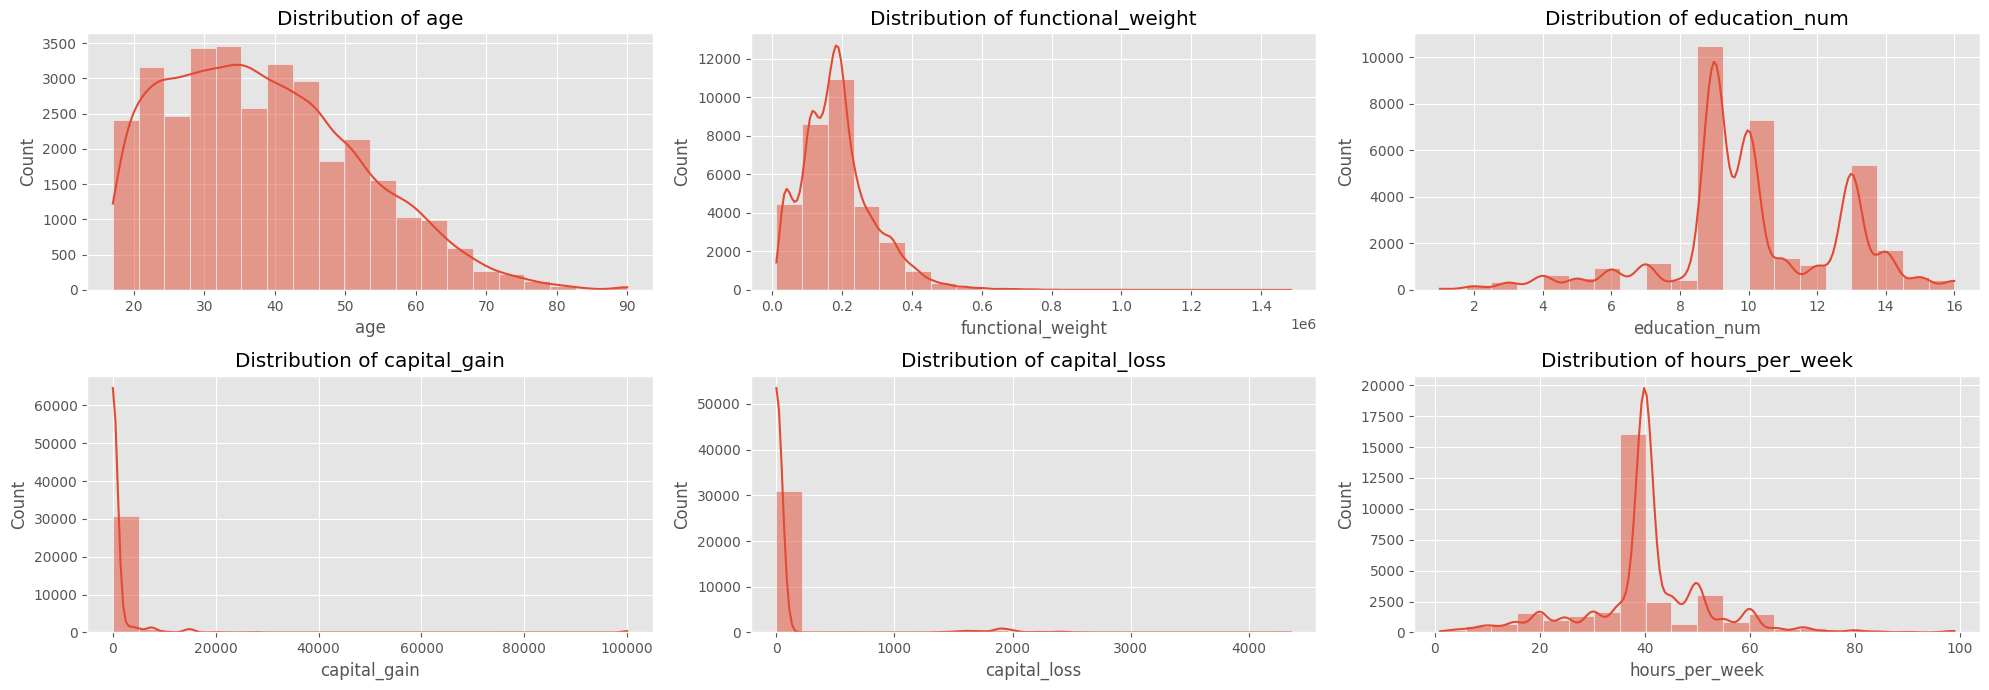

In [35]:
# Plotting the distribution for each continuous column using histograms

# Create a 2x3 grid of subplots with a figure size of 20x7
fig, axs = plt.subplots(2, 3, figsize=(20, 7))

axs = axs.flatten()

# Loop through each column in the list of continuous columns
for idx, col in enumerate(continuous_columns):
    
    # Flatten the axs array for easy indexing
    ax = axs[idx]
    
    # Replace infinite values with NaN, drop NaNs, and cast to float64
    clean_data = df[col].replace([np.inf, -np.inf], np.nan).dropna().astype(np.float64)
    
    # Plot histogram on the current axis (ax)
    sns.histplot(clean_data, kde=True, bins=20, ax=ax)
    
    # Set the title of the current subplot
    ax.set_title(f'Distribution of {col}')

# Adjust the layout so plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

---
### **Key Takeaways**

1. **Age Distribution**:
   - The majority of the individuals are aged between 20 and 50.
   - The distribution is slightly right-skewed, indicating there are more younger individuals compared to older ones.
2. **Functional Weight Distribution**:
   - The data seems to be predominantly clustered in the range 0 to 0.2e6.
   - There's a distinct peak in this range, with fewer data points as the functional weight increases.
3. **Education_Num Distribution**:
   - There are clear peaks which could correspond to specific education levels.
   - A majority seem to have around 10 years of education, but another significant group is around the 13-14 years mark.
4. **Capital Gain & Capital Loss Distributions**:
   - For both capital gain and loss, most individuals have little to no values, indicating minimal capital transactions.
   - However, there are a few outliers, especially in capital gain, that might need further investigation.
5. **Hours_per_Week Distribution**:
   - A large proportion of the data is centered around 40 hours per week, which is the standard workweek in many places.
   - Some individuals work significantly fewer or more hours, and understanding these outliers might be interesting.

---
### Outlier Detection using Box Plots

Box plots are a great way to visually inspect the distribution of your data and identify potential outliers. 

Key components of a box plot:
- **Median (Q2)**: The middle value of the dataset.
- **First Quartile (Q1)**: The middle number between the smallest number and the median of the dataset.
- **Third Quartile (Q3)**: The middle value between the median and the highest value of the dataset.
- **Whiskers**: The two lines outside the box that extend to the highest and lowest observations without considering outliers.
- **Outliers**: Data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Let's visualize our continuous variables using box plots.


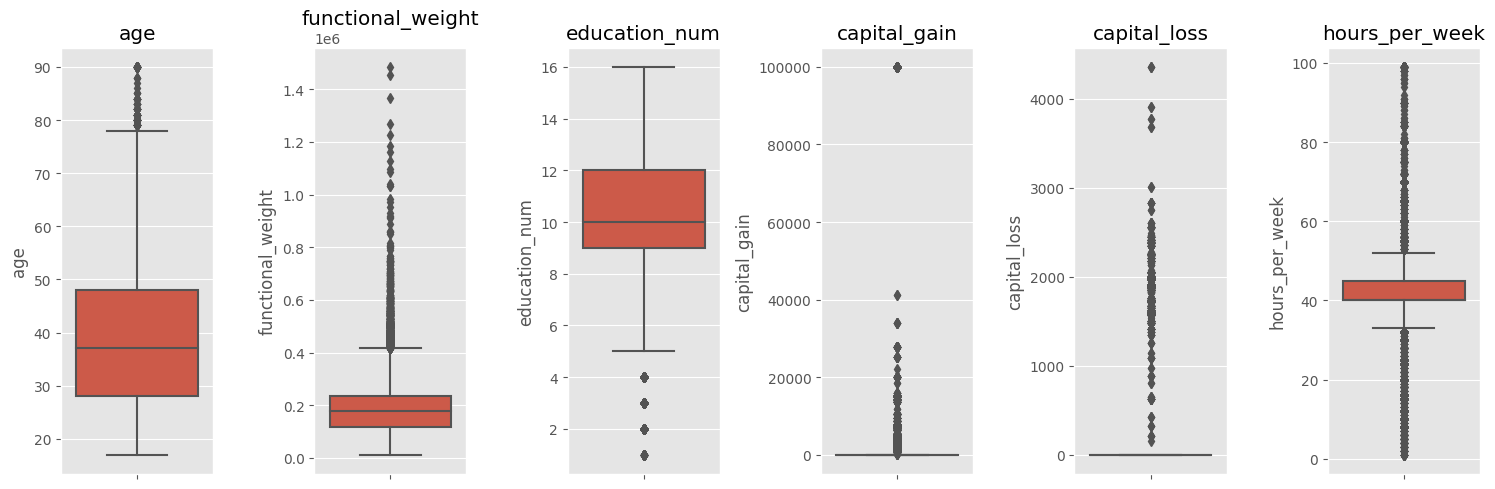

In [36]:
fig, axs = plt.subplots(1, 6, figsize=(15, 5))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# For each continuous variable, plot a box plot on a subplot
for idx, column in enumerate(continuous_columns):
    ax = axs[idx]
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'{column}')

plt.tight_layout()
plt.show()

---
### Outlier Detection in Continuous Columns

To identify outliers in our continuous columns, we employ the **Interquartile Range (IQR)** method. Here's a breakdown of our approach:

1. **Identify Continuous Columns**: First, we list out all the continuous columns that we want to check for outliers.

2. **Calculate the IQR for Each Column**: For every continuous column, we compute the IQR. It's the difference between the third quartile (Q3) and the first quartile (Q1). This gives us an idea of the spread of the middle 50% of the data.

3. **Determine the Outlier Bounds**: Using the IQR, we calculate the lower and upper bounds to define what constitutes an outlier. Any data point below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR` is treated as an outlier.

4. **Filter and Store the Outliers**: Finally, for each column, we filter out the outliers and store them in a dictionary for further examination.

With this method, outliers are effectively captured based on their deviation from the central portion of the data, providing a robust way to detect anomalies.

In [37]:
# List the continuous columns we're checking
print(continuous_columns)

outliers = {}

# Loop through each continuous column to detect outliers
for column in continuous_columns:
    
    # Calculate the Q1 (25th percentile) of the column
    Q1 = df[column].quantile(0.25)
    
    # Calculate the Q3 (75th percentile) of the column
    Q3 = df[column].quantile(0.75)
    
    # Compute the IQR (Interquartile Range) 
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter and store outliers for the current column
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

['age', 'functional_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [38]:
# Looping through the columns for which we've detected outliers
for col in outliers:
    
    # Finding the minimum and maximum outlier values for the current column
    outlier_min = outliers[col][col].min()
    outlier_max = outliers[col][col].max()
    
    # Printing the range of outlier values for the current column in a formatted manner
    print(f"Column: {col.upper()}")
    print(f"Outliers Range: {outlier_min} to {outlier_max}")
    print("-" * 40)  

Column: AGE
Outliers Range: 79 to 90
----------------------------------------
Column: FUNCTIONAL_WEIGHT
Outliers Range: 415913 to 1484705
----------------------------------------
Column: EDUCATION_NUM
Outliers Range: 1 to 4
----------------------------------------
Column: CAPITAL_GAIN
Outliers Range: 114 to 99999
----------------------------------------
Column: CAPITAL_LOSS
Outliers Range: 155 to 4356
----------------------------------------
Column: HOURS_PER_WEEK
Outliers Range: 1 to 99
----------------------------------------


---
### **Key Takeaways**

- **Age**: Outliers range from 79 to 90, capturing the older individuals in the dataset.
- **Functional Weight**: Outliers range from 415,913 to 1,484,705, indicating unusually high or low values.
- **Education_Num**: Outliers range from 1 to 4, suggesting very low levels of education.
- **Capital Gain**: Outliers range from 114 to 99,999, indicating a wide spread in capital gains.
- **Capital Loss**: Outliers range from 155 to 4356, suggesting that some individuals have significant capital losses.
- **Hours_per_Week**: Outliers range from 1 to 99, representing individuals working unusually short or long hours.

---
### Correlation Analysis
**Objective**  

In this section, we aim to understand how different numerical features correlate with each other and with the target variable 'Income'. This will help us identify features that might be useful for predictive modeling.  

**Methodology**  

We'll use Pearson's correlation coefficient to measure the linear relationship between variables. The coefficient ranges from -1 to 1, where:
- **-1**: Perfect negative correlation
- **0**: No correlation
- **1**: Perfect positive correlation  

We'll visualize this using a heatmap for better interpretability.


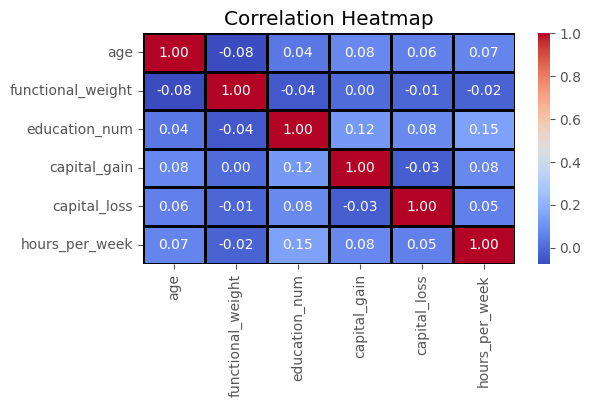

In [39]:
# Calculate the correlation matrix using Pearson's method
correlation_matrix = df.corr(numeric_only=True)

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title("Correlation Heatmap")
plt.show()

---
### **Key Takeaways**
- The dataset doesn't show any strong correlations between the numerical features. This is good news if you plan to build linear models, as it reduces the chance of multicollinearity.
- Because the correlations are so weak, it would be risky to draw any substantive conclusions about relationships between these variables based solely on these correlation coefficients.
---

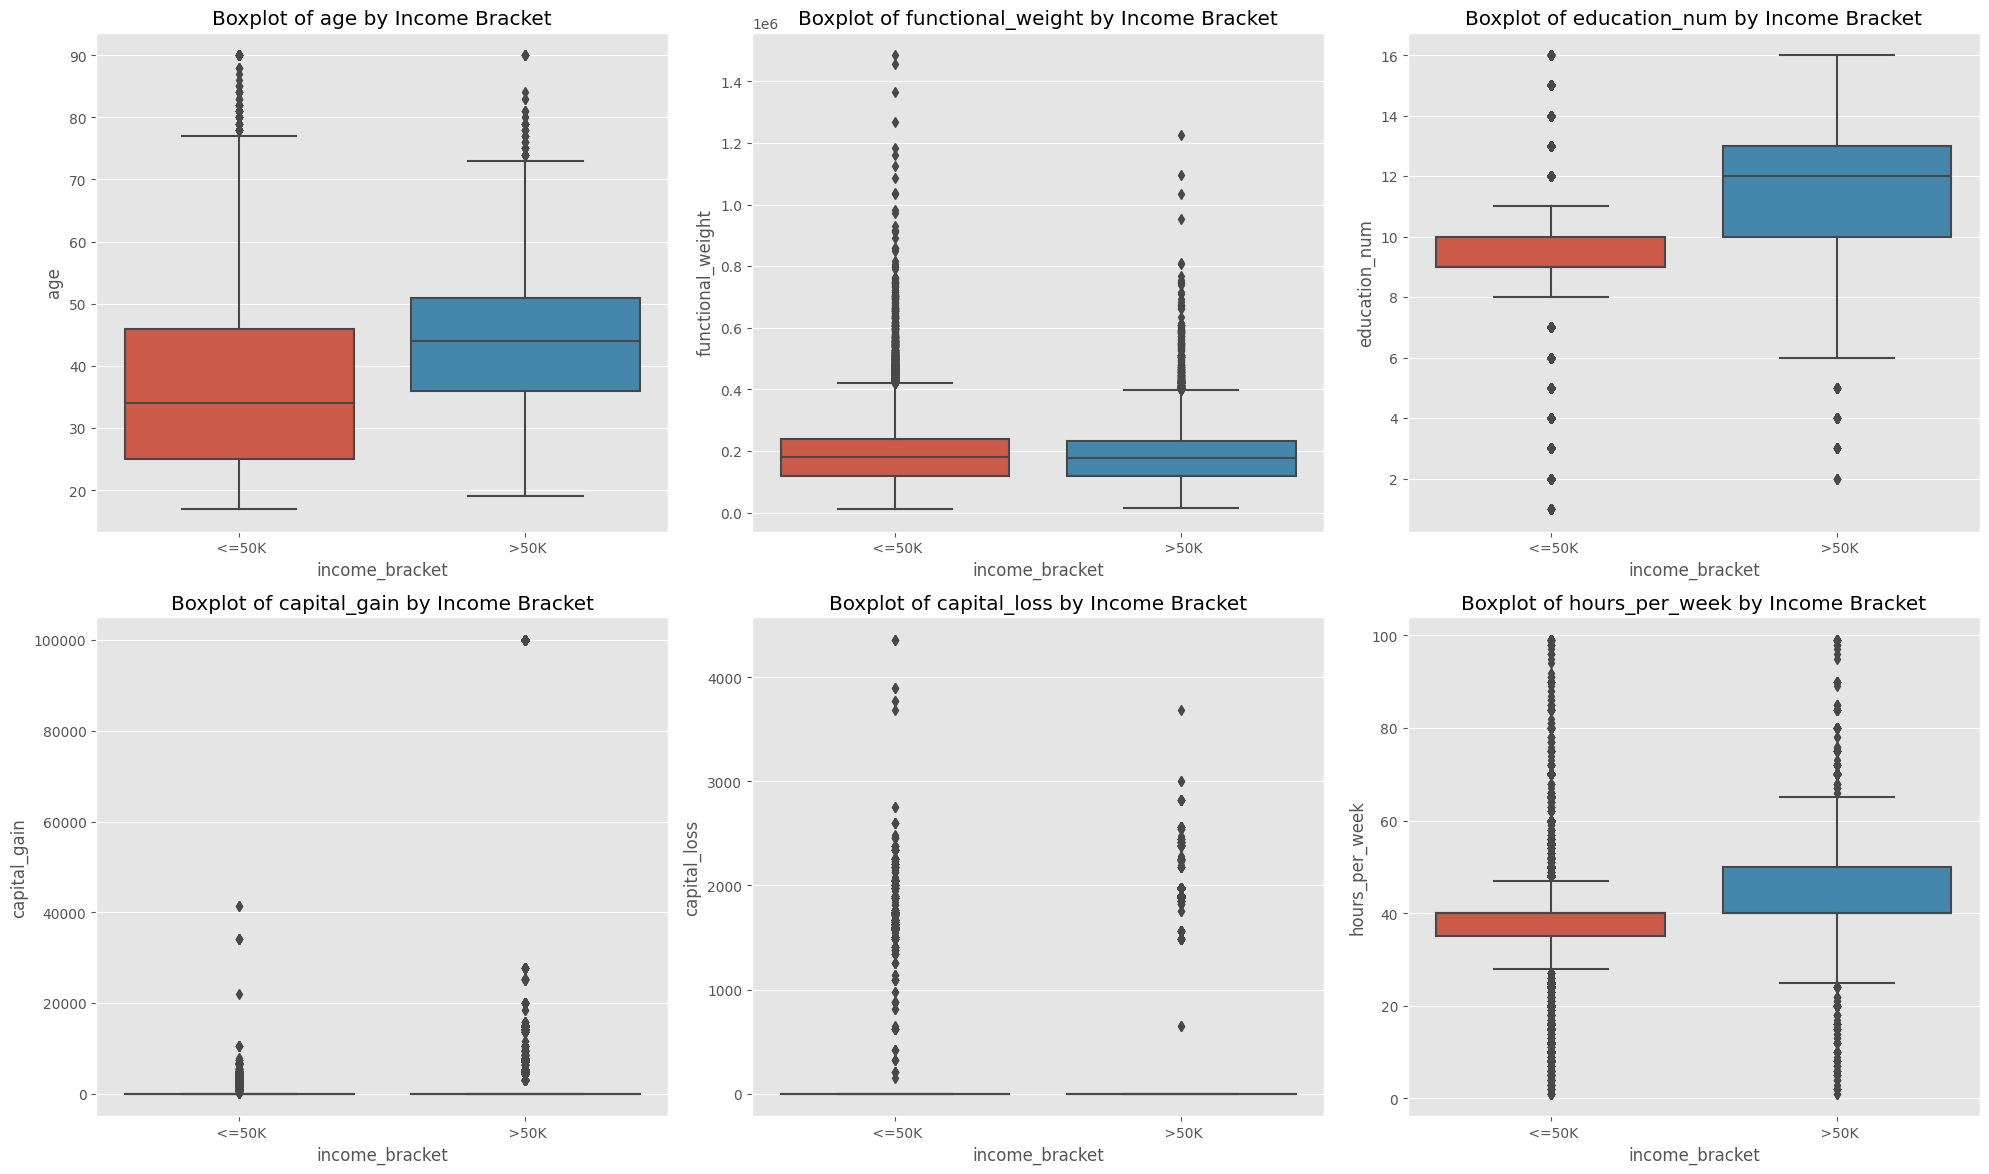

In [40]:
# Loop through continuous columns and create individual boxplots for each, categorized by 'income_bracket'
fig, axs = plt.subplots(2, 3, figsize=(20, 12), sharey=False)

# Flatten the 2x3 grid to a 1D array for easy indexing.
axs = axs.flatten()

for idx, col in enumerate(continuous_columns):
    sns.boxplot(data=df, x='income_bracket', y=col, ax=axs[idx])
    axs[idx].set_title(f'Boxplot of {col} by Income Bracket')

plt.tight_layout()
plt.show()

---
### **Key Takeaways**

- **Age**: Higher income (>50K) is generally associated with older age. The median age for this income group is noticeably higher than for those earning <=50K.
  
- **Functional Weight**: This feature doesn't seem to differ much between the two income groups, suggesting it might not be very useful for income prediction.
  
- **Education_Num**: A higher number of educational years tends to be associated with a higher income bracket (>50K). The median is distinctly higher in this group.
  
- **Capital Gain**: The <=50K group mostly reports low or zero capital gains. In contrast, the >50K group shows a more diverse range, including some high gains.
  
- **Capital Loss**: Similar to Capital Gain, the >50K income bracket shows a wider range of capital losses, but the median for both groups remains at zero.
  
- **Hours_per_Week**: People earning >50K generally work more hours per week. This is indicated by a higher median value compared to the <=50K income group.
---

# **Exploratory Data Analysis (EDA) Summary**

#### Introduction
This notebook presents an in-depth Exploratory Data Analysis (EDA) of the `census_adult_income` dataset. The dataset comprises over 32,561 records and 15 columns, capturing a variety of demographic, occupational, and income details.

#### Data Quality
Upon initial inspection, the dataset appears to be well-structured with no missing values. However, it's worth noting that some columns contain '?' as a placeholder, requiring further attention during the data cleaning phase.

#### Employment and Education
A majority of individuals are employed in the private sector, and the dataset reveals a concentration of high school graduates, followed by individuals with some college education and bachelor's degrees.

#### Gender and Marital Status
The dataset has a male predominance, and a large proportion of individuals are married, providing valuable context for interpreting income disparities.

#### Occupations and Income
The dataset includes a range of occupations, most notably in professional specialties, craft repair, and managerial roles. However, a majority of individuals fall under the <=50K income bracket.

#### Demographics
The racial composition is predominantly White, and most individuals are U.S. natives. This could introduce a bias if the dataset is used to generalize beyond U.S. demographics.

#### Continuous Variables
The numerical attributes offer additional layers of complexity:
- Age distribution is slightly right-skewed, suggesting a younger workforce.
- Most individuals work approximately 40 hours per week, but there are exceptions on both ends.
- Capital gains and losses are generally zero, with a few outliers indicating significant transactions.

#### Correlations
The correlation matrix doesn't indicate strong relationships between numerical attributes, reducing the risk of multicollinearity in subsequent predictive modeling.

With this understanding, the next steps would involve data cleaning, outlier treatment, and preparation for machine learning algorithms.